In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
4,146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,214229,2740278,65,4,single,rented,no,Civil_engineer,Thane,Maharashtra,4,10,0
201596,81573,7936020,24,18,single,rented,no,Web_designer,Sambhal,Uttar_Pradesh,5,12,0
201597,65556,7172998,36,16,single,rented,no,Dentist,Kurnool[18],Andhra_Pradesh,9,13,0
201598,183900,7539704,76,9,single,rented,no,Computer_operator,South_Dumdum,West_Bengal,5,12,0


In [4]:
test

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,76028,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,11
1,226614,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,13
2,65661,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,13
3,7056,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,11
4,231613,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
50395,242626,912537,27,20,single,rented,no,Flight_attendant,Bathinda,Punjab,11,11
50396,199819,2657803,61,9,single,rented,no,Petroleum_Engineer,Korba,Chhattisgarh,9,12
50397,86643,4106348,73,19,single,rented,no,Geologist,Kamarhati,West_Bengal,5,13
50398,178461,6982803,38,17,single,rented,no,Consultant,Bathinda,Punjab,5,11


In [5]:
train.shape , test.shape #checking the dimensionality of the train and test set

((201600, 13), (50400, 12))

In [6]:
train.info() #checking for non null, count and data type of the train set

<class 'pandas.core.frame.DataFrame'>
Index: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 201600 non-null  int64 
 1   Income             201600 non-null  int64 
 2   Age                201600 non-null  int64 
 3   Experience         201600 non-null  int64 
 4   Married/Single     201600 non-null  object
 5   House_Ownership    201600 non-null  object
 6   Car_Ownership      201600 non-null  object
 7   Profession         201600 non-null  object
 8   CITY               201600 non-null  object
 9   STATE              201600 non-null  object
 10  CURRENT_JOB_YRS    201600 non-null  int64 
 11  CURRENT_HOUSE_YRS  201600 non-null  int64 
 12  Risk_Flag          201600 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 21.5+ MB


In [7]:
test.info() #to veiw the non null column, count and data type of the test set

<class 'pandas.core.frame.DataFrame'>
Index: 50400 entries, 0 to 50399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 50400 non-null  int64 
 1   Income             50400 non-null  int64 
 2   Age                50400 non-null  int64 
 3   Experience         50400 non-null  int64 
 4   Married/Single     50400 non-null  object
 5   House_Ownership    50400 non-null  object
 6   Car_Ownership      50400 non-null  object
 7   Profession         50400 non-null  object
 8   CITY               50400 non-null  object
 9   STATE              50400 non-null  object
 10  CURRENT_JOB_YRS    50400 non-null  int64 
 11  CURRENT_HOUSE_YRS  50400 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.0+ MB


In [8]:
# A function that compares both numeric and categorical features in the train and test sets and highlight key differences in their summary statistics and checks for any missing values and visualizes flagged features if any. 
def compare_train_test_summary(train, test, target_col=None, cat_threshold=0.15, num_threshold=0.15):
    """
    Compare and visualize numeric and categorical feature summaries between train and test datasets, check for missing values and visualizes flagged features.

    Args:
        train (pd.DataFrame): Training set
        test (pd.DataFrame): Testing set
        target_col (str): Target column to exclude (optional)
        cat_threshold (float): Threshold for top category proportion difference
        num_threshold (float): Threshold for numeric mean/std difference
    """
    print("\n Comparing Train vs Test Summary Statistics...\n")

    if target_col:
        common_cols = train.columns.intersection(test.columns).drop(target_col, errors='ignore')
    else:
        common_cols = train.columns.intersection(test.columns)

    numeric_cols = train[common_cols].select_dtypes(include=['number']).columns
    categorical_cols = train[common_cols].select_dtypes(include=['object', 'category']).columns

    flagged_numeric = []
    flagged_categorical = []

    print(" Numeric Features Summary Comparison")
    print("-" * 50)
    for col in numeric_cols:
        train_stats = train[col].describe()
        test_stats = test[col].describe()

        mean_diff = abs(train_stats['mean'] - test_stats['mean']) / max(train_stats['mean'], 1e-6)
        std_diff = abs(train_stats['std'] - test_stats['std']) / max(train_stats['std'], 1e-6)

        print(f"\n Feature: {col}")
        print(f"Train -> mean: {train_stats['mean']:.2f}, std: {train_stats['std']:.2f}, nulls: {train[col].isnull().sum()}")
        print(f"Test  -> mean: {test_stats['mean']:.2f}, std: {test_stats['std']:.2f}, nulls: {test[col].isnull().sum()}")

        if mean_diff > num_threshold:
            print(" Mean difference > threshold")
            flagged_numeric.append(col)
        if std_diff > num_threshold:
            print(" Std deviation difference > threshold")
            if col not in flagged_numeric:
                flagged_numeric.append(col)

    print("\n Categorical Features Summary Comparison")
    print("-" * 50)
    for col in categorical_cols:
        train_top = train[col].value_counts(normalize=True).head(1)
        test_top = test[col].value_counts(normalize=True).head(1)

        train_top_cat = train_top.index[0]
        train_top_freq = train_top.iloc[0]
        test_top_freq = test_top.get(train_top_cat, 0)

        print(f"\n Feature: {col}")
        print(f"Train -> top: '{train_top_cat}' ({train_top_freq:.2f}), nulls: {train[col].isnull().sum()}")
        print(f"Test  -> top: '{train_top_cat}' in test: ({test_top_freq:.2f}), nulls: {test[col].isnull().sum()}")

        if abs(train_top_freq - test_top_freq) > cat_threshold:
            print(" Top category proportion differs")
            flagged_categorical.append(col)

        unseen = set(test[col].unique()) - set(train[col].unique())
        if unseen:
            print(f" Unseen categories in test: {unseen}")
            if col not in flagged_categorical:
                flagged_categorical.append(col)

    # Missing Value Summary
    print("\n Missing Value Check")
    print("-" * 50)
    for col in common_cols:
        train_null = train[col].isnull().sum()
        test_null = test[col].isnull().sum()
        if train_null > 0 or test_null > 0:
            print(f" {col} -> Train Nulls: {train_null}, Test Nulls: {test_null}")

    #  Visualize flagged numeric features
    for col in flagged_numeric:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(train[col].dropna(), label='Train', shade=True)
        sns.kdeplot(test[col].dropna(), label='Test', shade=True)
        plt.title(f" Distribution Difference in Numeric Feature: {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    #  Visualize flagged categorical features
    for col in flagged_categorical:
        train_dist = train[col].value_counts(normalize=True)
        test_dist = test[col].value_counts(normalize=True)
        combined = pd.concat([train_dist, test_dist], axis=1, keys=['Train', 'Test']).fillna(0)
        combined = combined.sort_values(by='Train', ascending=False).head(10)

        combined.plot(kind='bar', figsize=(8, 4), title=f" Top Categories Difference: {col}")
        plt.ylabel("Proportion")
        plt.tight_layout()
        plt.show()


In [9]:
compare_train_test_summary(train, test, target_col='Risk_Flag')



 Comparing Train vs Test Summary Statistics...

 Numeric Features Summary Comparison
--------------------------------------------------

 Feature: Id
Train -> mean: 126134.13, std: 72832.64, nulls: 0
Test  -> mean: 125465.96, std: 72398.04, nulls: 0

 Feature: Income
Train -> mean: 4995703.03, std: 2877975.43, nulls: 0
Test  -> mean: 5002771.21, std: 2879674.58, nulls: 0

 Feature: Age
Train -> mean: 49.97, std: 17.07, nulls: 0
Test  -> mean: 49.90, std: 17.04, nulls: 0

 Feature: Experience
Train -> mean: 10.08, std: 6.00, nulls: 0
Test  -> mean: 10.08, std: 6.01, nulls: 0

 Feature: CURRENT_JOB_YRS
Train -> mean: 6.34, std: 3.65, nulls: 0
Test  -> mean: 6.32, std: 3.64, nulls: 0

 Feature: CURRENT_HOUSE_YRS
Train -> mean: 12.00, std: 1.40, nulls: 0
Test  -> mean: 12.00, std: 1.40, nulls: 0

 Categorical Features Summary Comparison
--------------------------------------------------

 Feature: Married/Single
Train -> top: 'single' (0.90), nulls: 0
Test  -> top: 'single' in test: (0.90

In [10]:
# lets visualize the distribution of the train and test dataset for better understanding of the summary statistis comparison above

def plot_feature_distributions(train, test, n_cols=2, top_n=10):
    """
    Visualizes the distribution of numeric and categorical features for train and test datasets.

    Args:
        train (pd.DataFrame): Training dataset.
        test (pd.DataFrame): Testing dataset.
        n_cols (int): Number of columns per row in grid layout.
        top_n (int): Number of top categories to show for categorical features.
    """

    target_col = 'Risk_Flag'  # Optional: change if needed
    common_cols = train.columns.intersection(test.columns).drop(target_col, errors='ignore')

    numeric_cols = train[common_cols].select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = train[common_cols].select_dtypes(include=['object', 'category']).columns

    print(f"\n Common numeric features: {list(numeric_cols)}")
    print(f"\n Common categorical features: {list(categorical_cols)}")

    def clean_text_columns(df, cat_cols):
        return df.assign(**{
            col: df[col].astype(str).str.replace(r'\[.*?\]', '', regex=True).str.strip()
            for col in cat_cols
        })

    train = clean_text_columns(train, categorical_cols)
    test = clean_text_columns(test, categorical_cols)

    # Visualize numeric features
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(train[col].dropna(), label='Train', shade=True)
        sns.kdeplot(test[col].dropna(), label='Test', shade=True)
        plt.title(f"Distribution of Numeric Feature: {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Visualize categorical features
    for col in categorical_cols:
        train_dist = train[col].value_counts(normalize=True).rename("Train")
        test_dist = test[col].value_counts(normalize=True).rename("Test")
        combined = pd.concat([train_dist, test_dist], axis=1).fillna(0).head(top_n)

        combined.plot(kind='bar', figsize=(8, 4), title=f"Category Distribution: {col}")
        plt.ylabel("Proportion")
        plt.tight_layout()
        plt.show()



 Common numeric features: ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

 Common categorical features: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


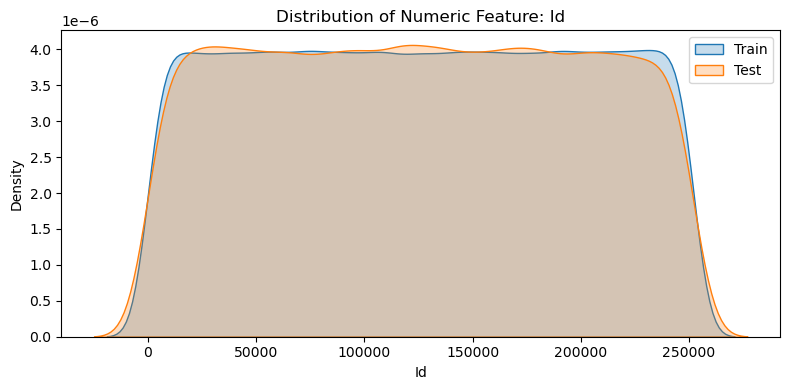

C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


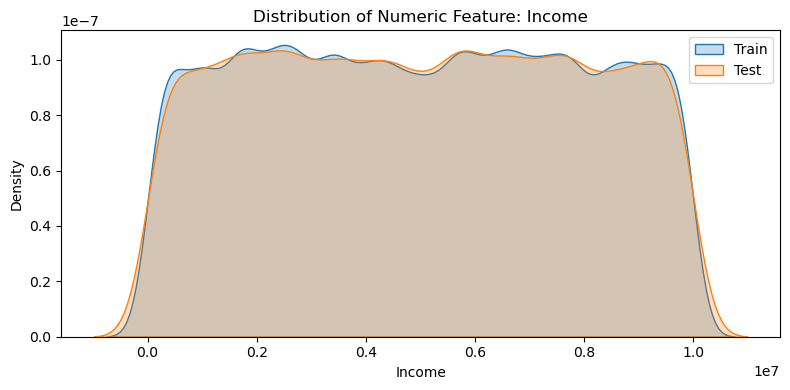

C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


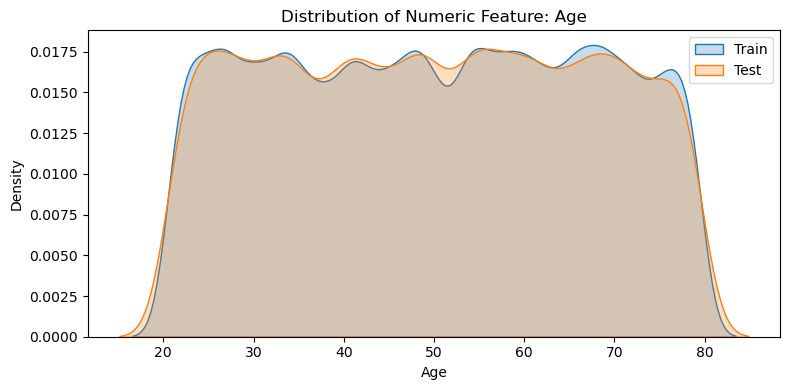

C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


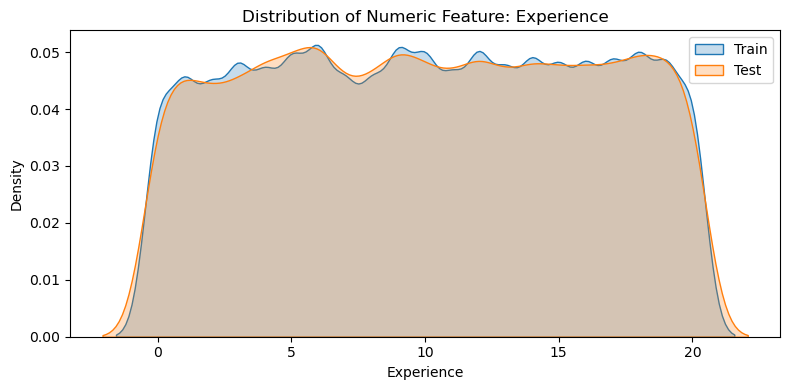

C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


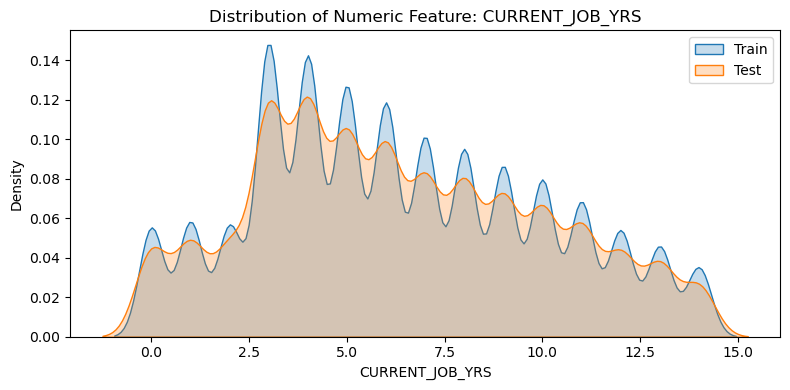

C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col].dropna(), label='Train', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23408\3630875608.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[col].dropna(), label='Test', shade=True)


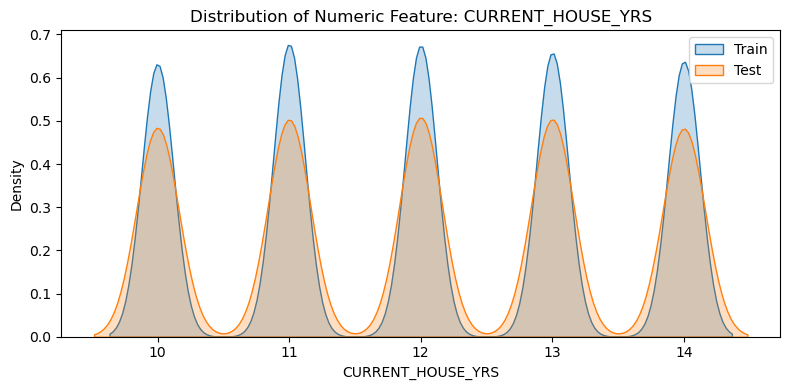

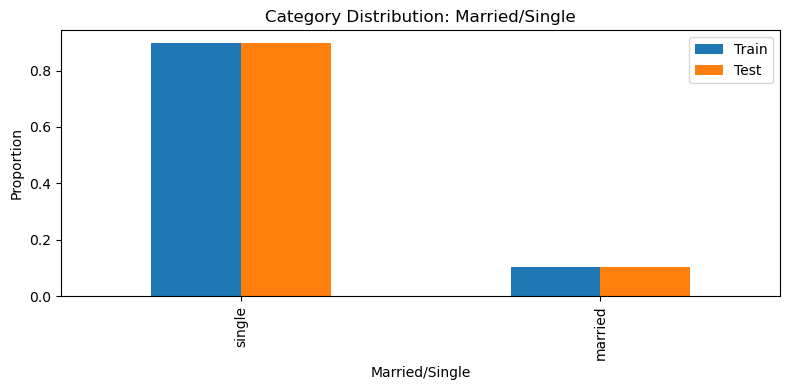

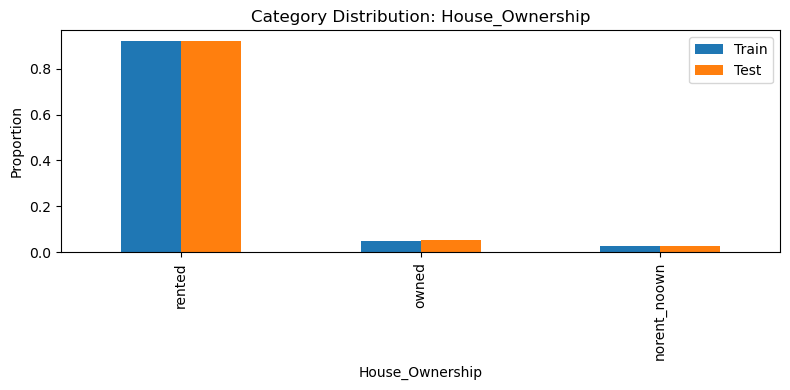

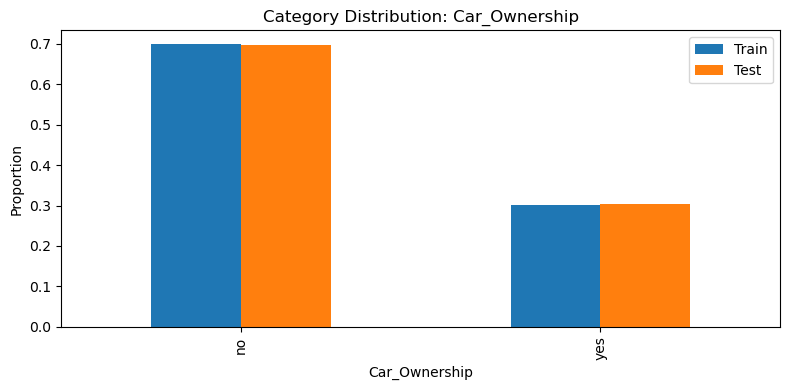

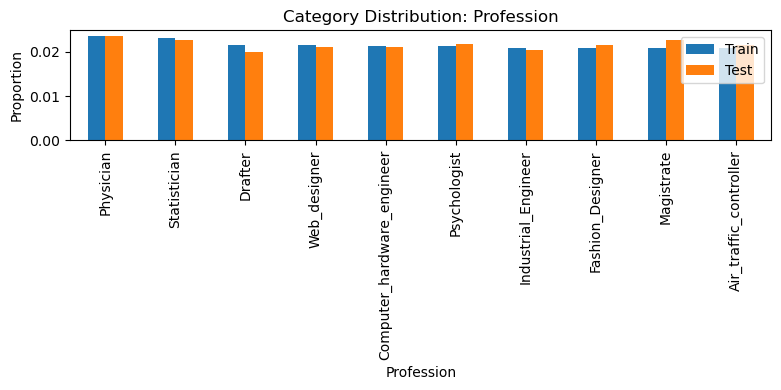

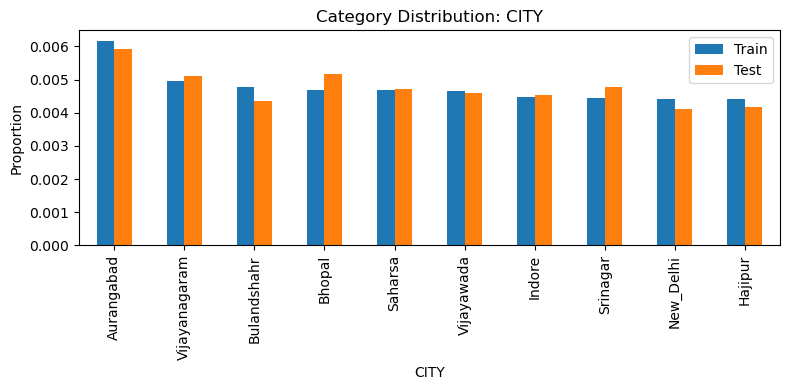

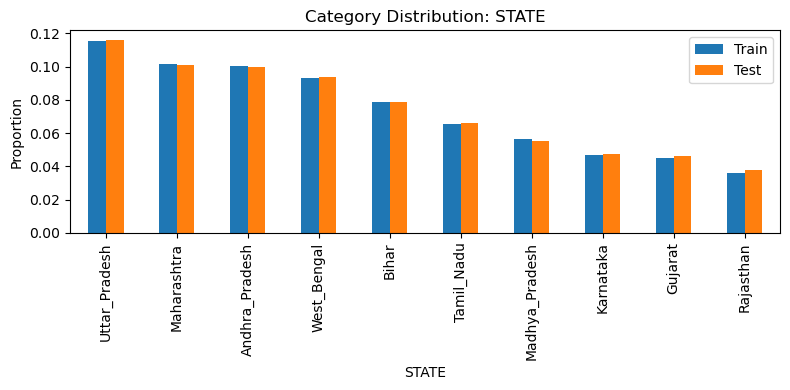

In [11]:
plot_feature_distributions(train, test)


## Key Insight:
Numeric Features:

1.All numeric features have very similar means and standard deviations across train and test.

2.No null values.

3.No warning flags triggered 

Conclusion: Numeric features are well distributed between train and test. 

Categorical Features:

1.Top categories (like 'single' in Married/Single, 'rented' in House_Ownership) have identical proportions in both sets.

2.Even CITY and STATE have consistent top categories and no nulls.

3.No unseen categories from test in train.

Conclusion: Categorical features are also consistently distributed between sets.

With this, lets proceed to check the relationship that exist between our features using only our train dataset. this will help detect redundancy and reduce multicollinearity.


In [12]:
# A function that performs feature interaction analysis on our categorical train dataset

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

def categorical_relationships_cramers_v(df, cat_features, plot=True):
    """
    Computes Cramér’s V statistic between pairs of categorical features.

    Args:
        df (DataFrame): Input DataFrame.
        cat_features (list): List of categorical column names.
        plot (bool): Whether to plot the heatmap.

    Returns:
        pd.DataFrame: Cramér's V matrix.
    """
    cramers_results = pd.DataFrame(index=cat_features, columns=cat_features)

    for col1 in cat_features:
        for col2 in cat_features:
            if col1 == col2:
                cramers_results.loc[col1, col2] = 1.0
            else:
                confusion_mat = pd.crosstab(df[col1], df[col2])
                v = cramers_v(confusion_mat)
                cramers_results.loc[col1, col2] = round(v, 3)

    cramers_results = cramers_results.astype(float)

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cramers_results, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Cramér's V Heatmap (Categorical Feature Associations)")
        plt.tight_layout()
        plt.show()

    return cramers_results


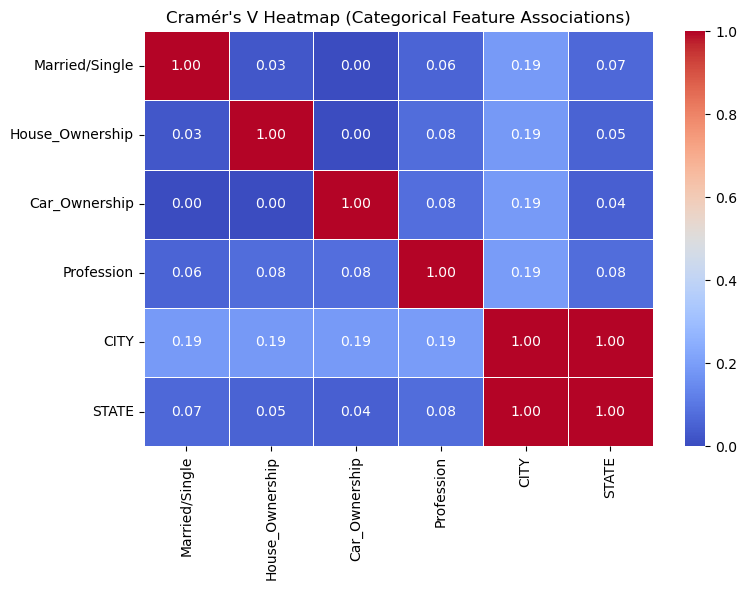

In [13]:
cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
cramers_matrix = categorical_relationships_cramers_v(train, cat_features)



In [14]:
# A function that performs interactive feature analysis on our numerical features  
def numerical_relationships_corr(df, num_features, plot_pairplot=False):
    """
    Computes correlation matrix and visualizes relationships between numerical features.

    Args:
        df (DataFrame): Input DataFrame.
        num_features (list): List of numerical column names.
        plot_pairplot (bool): If True, also displays a pairplot.

    Returns:
        pd.DataFrame: Correlation matrix.
    """
    # Compute correlation matrix
    corr_matrix = df[num_features].corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap (Numerical Feature Associations)")
    plt.tight_layout()
    plt.show()

    # Optional: Pairplot
    if plot_pairplot:
        sns.pairplot(df[num_features], corner=True)
        plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
        plt.show()

    return corr_matrix


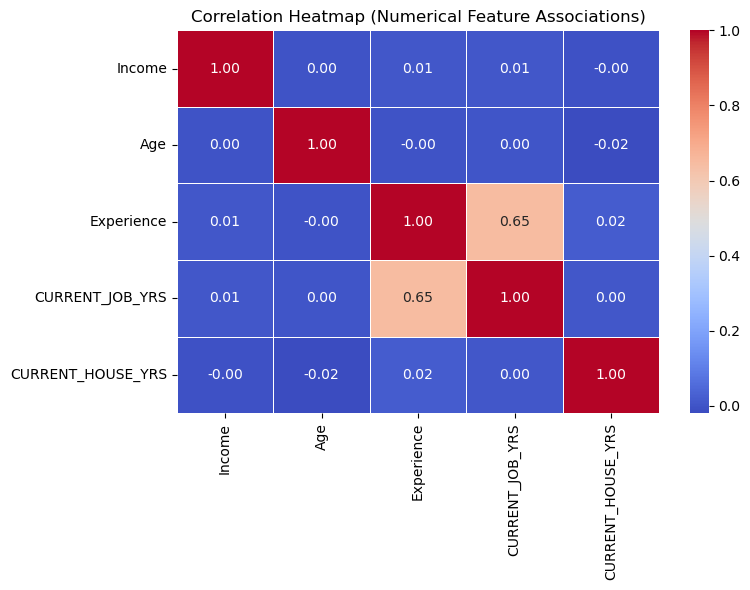

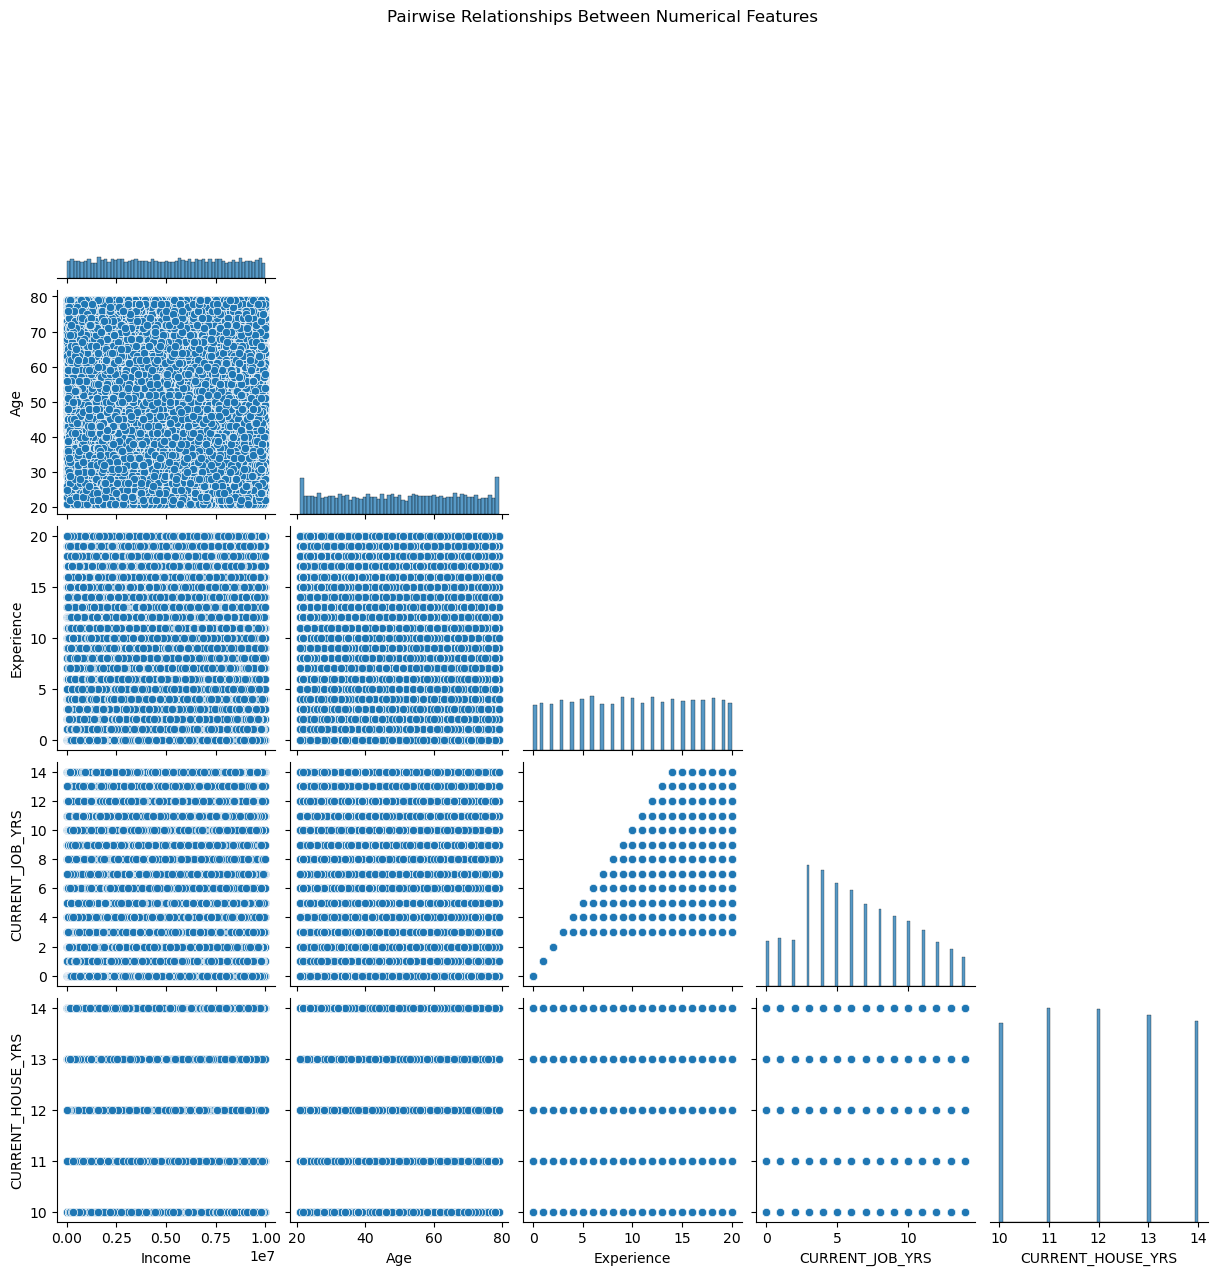

In [15]:
num_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
corr_matrix = numerical_relationships_corr(train, num_features, plot_pairplot=True)


## Feature Interaction Analysis Report:

**Overview**
This report presents insights from the exploratory feature interaction analysis conducted on the training dataset. The goal was to understand the relationships between features — both numeric and categorical — before proceeding with mod
e Numeric Features

**Tools Used**:
- Correlation Heatmap
- Pairwise Scatterplots (Pairplot)

**Key Findings**:
- Most numeric feature pairs show **weak or no linear relationship**:
  - Correlation coefficients are close to 0.
  - Scatterplots show dispersed data points, with no clear pattern.
- One notable exception is:
  - **`Experience` vs `CURRENT_JOB_YRS`**:
    - Moderate positive correlation.
    - Scatterplot reveals a loose upward trend.
    - Suggests people with more experience tend to havdir.

---

## 🔤 Categorical Features

**Tools Used**:
- Cramér’s V Correlation Matrix

**Key Findings**:
- Most categorical feature pairs exhibit **low association** (Cramér’s V < 0.3).
- Indicates that categorical features are largely **independent** and **non-redundant**.
- No strong overlaps or multicollinearity observthical variables.

---

## ✅ Conclusion

- **Low multicollinearity** among both numeric and categorical features.
- **`Experience` and `CURRENT_JOB_YRS`** may be partially redundant and worth considering during feature selection.
- Independence between other features is beneficial for modeling, as it improves glization and interpretability.

---



In [16]:
# A diagnostic report function that shows what’s going on in our dataset before cleaning. 

def data_diagnostic_report(df):
    """
    Prints a summary diagnostic report of a DataFrame including:
    - Shape
    - Missing values per column
    - Duplicate rows
    - Data types
    - Unique values for categorical columns
    """
    print("\n Dataset Diagnostic Report")
    print("-" * 40)
    print(f"Shape of the dataset: {df.shape}")

    print("\n Missing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values detected.")

    print("\n Duplicates:")
    dupes = df.duplicated().sum()
    print(f"Number of duplicate rows: {dupes}")

    print("\n Data Types:")
    print(df.dtypes)

    print("\n Unique Value Counts (Categorical Columns):")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        print(f"\n-- {col} --")
        print(df[col].value_counts(dropna=False))

    print("\n End of Report")


In [17]:
data_diagnostic_report(train)


 Dataset Diagnostic Report
----------------------------------------
Shape of the dataset: (201600, 13)

 Missing Values:
No missing values detected.

 Duplicates:
Number of duplicate rows: 0

 Data Types:
Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

 Unique Value Counts (Categorical Columns):

-- Married/Single --
Married/Single
single     181036
married     20564
Name: count, dtype: int64

-- House_Ownership --
House_Ownership
rented          185621
owned            10252
norent_noown      5727
Name: count, dtype: int64

-- Car_Ownership --
Car_Ownership
no     140877
yes     60723
Name: count, dtype: int64

-- Profession --
Profession
Physician           

In [18]:
data_diagnostic_report(test)


 Dataset Diagnostic Report
----------------------------------------
Shape of the dataset: (50400, 12)

 Missing Values:
No missing values detected.

 Duplicates:
Number of duplicate rows: 0

 Data Types:
Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
dtype: object

 Unique Value Counts (Categorical Columns):

-- Married/Single --
Married/Single
single     45236
married     5164
Name: count, dtype: int64

-- House_Ownership --
House_Ownership
rented          46277
owned            2666
norent_noown     1457
Name: count, dtype: int64

-- Car_Ownership --
Car_Ownership
no     35123
yes    15277
Name: count, dtype: int64

-- Profession --
Profession
Physician                     1186
Statistician         

 From the above report, our train and test set seem to have no missing values and no duplicates but there are some inconsistencies with  some names being observed in the state and city features. the next cell contains a function that handles this.

In [19]:
# A function to clean categorical inconsistencies in our train dataset.
def clean_categorical_inconsistencies(df, columns):
    """
    Cleans inconsistencies in categorical columns by removing text in square brackets (e.g., [5]) 
    and stripping leading/trailing whitespace.
    
    Parameters:
    - df (pd.DataFrame): The dataset to clean.
    - columns (list): List of categorical column names to clean.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    for col in columns:
        df[col] = df[col].astype(str).str.replace(r'\[.*?\]', '', regex=True)  # Remove [text]
        df[col] = df[col].str.strip()  # Remove leading/trailing whitespace
    return df


In [20]:
# Cleaning the 'STATE' and 'CITY' columns in our train and test dataset
categorical_columns_to_clean = ['STATE', 'CITY']
train = clean_categorical_inconsistencies(train, categorical_columns_to_clean)
test = clean_categorical_inconsistencies(test, categorical_columns_to_clean)


In [21]:
data_diagnostic_report(train)



 Dataset Diagnostic Report
----------------------------------------
Shape of the dataset: (201600, 13)

 Missing Values:
No missing values detected.

 Duplicates:
Number of duplicate rows: 0

 Data Types:
Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

 Unique Value Counts (Categorical Columns):

-- Married/Single --
Married/Single
single     181036
married     20564
Name: count, dtype: int64

-- House_Ownership --
House_Ownership
rented          185621
owned            10252
norent_noown      5727
Name: count, dtype: int64

-- Car_Ownership --
Car_Ownership
no     140877
yes     60723
Name: count, dtype: int64

-- Profession --
Profession
Physician           

In [22]:
data_diagnostic_report(test)


 Dataset Diagnostic Report
----------------------------------------
Shape of the dataset: (50400, 12)

 Missing Values:
No missing values detected.

 Duplicates:
Number of duplicate rows: 0

 Data Types:
Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
dtype: object

 Unique Value Counts (Categorical Columns):

-- Married/Single --
Married/Single
single     45236
married     5164
Name: count, dtype: int64

-- House_Ownership --
House_Ownership
rented          46277
owned            2666
norent_noown     1457
Name: count, dtype: int64

-- Car_Ownership --
Car_Ownership
no     35123
yes    15277
Name: count, dtype: int64

-- Profession --
Profession
Physician                     1186
Statistician         

Now that the inconsistency has been handled, lets proceed with preprocessing our train dataset. i.e encoding our categorical features and standardizing the numerical ones on both train and test sets.

In [23]:
X = train.drop('Risk_Flag', axis=1)
y = train['Risk_Flag']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# — 2) define columns —
num_cols = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
cat_cols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']

# — 3) build and fit preprocessing on X_train —
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])
X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc   = preprocessor.transform(X_val)
X_test_enc  = preprocessor.transform(test)     # test has same raw columns

# — 4) wrap into DataFrames so we can name columns —
ohe = preprocessor.named_transformers_['cat']
cat_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_names

X_train_df = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train.index)
X_val_df   = pd.DataFrame(X_val_enc,   columns=feature_names, index=X_val.index)
X_test_df  = pd.DataFrame(X_test_enc,  columns=feature_names, index=test.index)



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

def analyze_feature_selection(X_df: pd.DataFrame, y: pd.Series, top_k: int = 20):
    """
    1) Computes & plots correlation of each numeric feature in X_df with y.
    2) Trains a RandomForest on (X_df, y), prints & plots the top_k feature importances.
    
    Parameters:
      - X_df : pd.DataFrame of encoded & scaled features (train only)
      - y    : pd.Series of the target (same index as X_df)
      - top_k: how many top features to display/plot by importance
    """
    # Ensure alignment
    X_df = X_df.copy()
    y = y.reindex(X_df.index)
    
    # 1) Correlation (only numeric columns)
    corr = X_df.corrwith(y).sort_values(ascending=False)
    print("=== Feature Correlation with Target ===\n")
    print(corr, "\n")
    
    # Plot correlations
    plt.figure(figsize=(8, len(corr)*0.02 + 1))
    sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
    plt.title("Feature Correlation with Target")
    plt.xlabel("Pearson Correlation")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    
    # 2) RandomForest feature importance
    rf = RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_df, y)
    
    imp_df = (
        pd.DataFrame({
            'feature': X_df.columns,
            'importance': rf.feature_importances_
        })
        .sort_values('importance', ascending=False)
        .reset_index(drop=True)
    )
    print(f"=== Top {top_k} Features by RandomForest Importance ===\n")
    print(imp_df.head(top_k), "\n")
    
    # Plot top_k importances
    plt.figure(figsize=(8, top_k * 0.3 + 1))
    sns.barplot(
        x='importance',
        y='feature',
        data=imp_df.head(top_k),
        palette="viridis"
    )
    plt.title(f"Top {top_k} Feature Importances (RandomForest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    
    return corr, imp_df


=== Feature Correlation with Target ===

CITY_Bhubaneswar          0.027790
CITY_Gwalior              0.027163
House_Ownership_rented    0.026701
STATE_Madhya_Pradesh      0.023454
CITY_Kochi                0.022495
                            ...   
Car_Ownership_yes        -0.021065
Married/Single_married   -0.021211
Age                      -0.022840
House_Ownership_owned    -0.023157
Experience               -0.035737
Length: 407, dtype: float64 



C:\Users\USER\AppData\Local\Temp\ipykernel_23408\24799775.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


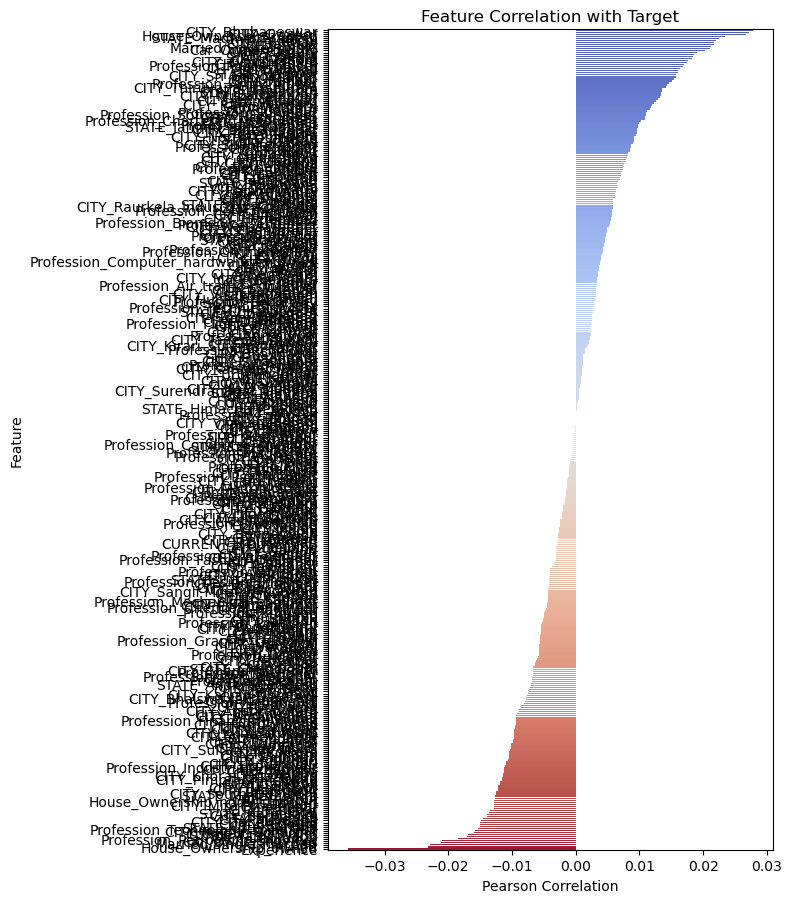

=== Top 20 Features by RandomForest Importance ===

                   feature  importance
0                   Income    0.099468
1                      Age    0.083863
2               Experience    0.059459
3          CURRENT_JOB_YRS    0.055302
4        CURRENT_HOUSE_YRS    0.044970
5        Car_Ownership_yes    0.008133
6         Car_Ownership_no    0.008108
7     STATE_Andhra_Pradesh    0.008049
8      STATE_Uttar_Pradesh    0.008006
9        STATE_West_Bengal    0.007765
10       STATE_Maharashtra    0.007760
11             STATE_Bihar    0.007009
12           STATE_Gujarat    0.005710
13        STATE_Tamil_Nadu    0.005575
14    STATE_Madhya_Pradesh    0.005363
15         STATE_Karnataka    0.005192
16    Profession_Physician    0.004808
17           STATE_Haryana    0.004785
18         STATE_Jharkhand    0.004669
19  House_Ownership_rented    0.004667 



C:\Users\USER\AppData\Local\Temp\ipykernel_23408\24799775.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


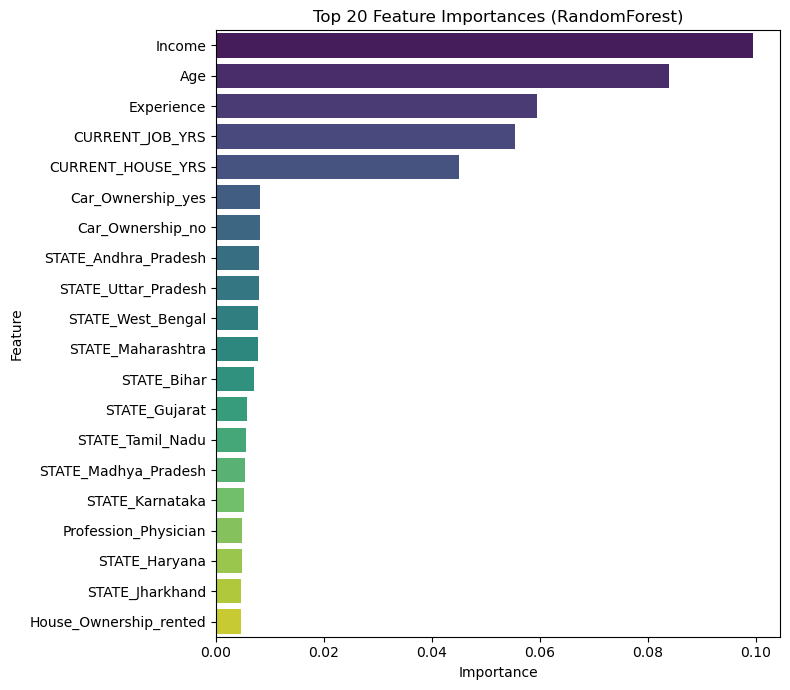

In [25]:

 corr_train, fi_train = analyze_feature_selection(X_train_df, y_train, top_k=20)

## key insights:

The correlation analysis reveals that individual features have very weak relationships with the target (ranging from -0.04 to +0.03), indicating that no single feature is strongly predictive on its own. However, feature importance from the Random Forest model highlights that Income, Age, Experience, Current Job Years, and Current House Years are the most influential predictors, while specific city features show minimal impact.

To enhance model performance, we propose creating engineered features such as:

Income-to-Age Ratio – captures wealth relative to age.

Income per Experience – reflects career progression efficiency.

Job Stability and Home Stability – indicate personal and residential stability.

Grouped Professions – reduce noise in profession categories.

Age Grouping – segments users by life stage.

These features aim to improve the model’s ability to capture complex patterns beyond what is visible through raw variables.

In [26]:
# A function that creates new features and group professions into broader categories

def create_engineered_features(df):
    # 1. Income to Age ratio
    df['Income_to_Age'] = df['Income'] / (df['Age'] + 1e-5)

    # 2. Income per Experience
    df['Income_per_Experience'] = df['Income'] / (df['Experience'] + 1e-5)

    # 3. Job Stability = Current Job Years / Experience
    df['Job_Stability'] = df['CURRENT_JOB_YRS'] / (df['Experience'] + 1e-5)

    # 4. Home Stability = Current House Years / Age
    df['Home_Stability'] = df['CURRENT_HOUSE_YRS'] / (df['Age'] + 1e-5)

    # 5. Age Grouping (life stage bins)
    df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                             labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

    # 6. Group professions into broader categories
    profession_groups = {
        'Engineering': ['Engineer', 'Mechanical_engineer', 'Civil_engineer', 'Chemical_engineer', 'Design_Engineer', 'Computer_hardware_engineer', 'Industrial_Engineer', 'Technician'],
        'Healthcare': ['Dentist', 'Physician', 'Surgeon', 'Microbiologist', 'Psychologist'],
        'Technology': ['Software_Developer', 'Technology_specialist', 'Computer_operator', 'Web_designer', 'Technical_writer'],
        'Finance': ['Financial_Analyst', 'Economist', 'Chartered_Accountant', 'Statistician'],
        'Creative': ['Artist', 'Graphic_Designer', 'Fashion_Designer', 'Designer', 'Comedian'],
        'Government': ['Civil_servant', 'Army_officer', 'Police_officer', 'Magistrate', 'Politician', 'Official'],
        'Other': ['Chef', 'Secretary', 'Flight_attendant', 'Hotel_Manager', 'Librarian', 'Consultant', 'Lawyer', 'Architect', 'Analyst', 'Surveyor']
    }

    # Create new column with grouped profession
    def assign_prof_group(row):
        for group, profs in profession_groups.items():
            for prof in profs:
                col = f'Profession_{prof}'
                if col in row and row[col] == 1:
                    return group
        return 'Unknown'

    df['Profession_Group'] = df.apply(assign_prof_group, axis=1)

    # One-hot encode Age_Group and Profession_Group
    df = pd.get_dummies(df, columns=['Age_Group', 'Profession_Group'], drop_first=True)

    return df


In [27]:
X_train_eng = create_engineered_features(X_train_df.copy())
X_val_eng   = create_engineered_features(X_val_df.copy())
test_eng    = create_engineered_features(X_test_df.copy())


In [28]:
X_train_eng.shape, test_eng.shape #checking the dimensionality after creating new features

((161280, 423), (50400, 423))

Our dataset is obviously highly dimensional from the output result abve. This can affect our model training speed.In other to avoid this while still aiming at improving model performance and avoiding overfitting, i will be using the embedded method for dimensionality reduction which typically involves the use of a tree base model to select important features. In this case i will be using random forest model again. why random forest?, Tree-based models like Random Forest are nonlinear, robust to scaling, and can naturally handle mixed data which makes it perfect for high-dimensional datasets like this.

In [29]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# — make sure X_train_eng is a DataFrame with named columns —
# X_train_eng = create_engineered_features(...)

# 1) Extract feature names from the DataFrame
feature_names = X_train_eng.columns.to_numpy()

# 2) Fit RandomForest on the engineered train split
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_eng, y_train)

# 3) Get importances and pick top_n indices
importances = rf.feature_importances_
top_n = 100
inds = np.argsort(importances)[-top_n:]

# 4) Map those indices back to column names
top_features = feature_names[inds].tolist()

# 5) (Optional) sort top_features by importance descending
top_features = [f for _,f in sorted(zip(importances[inds], top_features), key=lambda x: -x[0])]

# Print top N features with their importance scores
print(top_features)

# reduce all sets
X_train_red = X_train_eng[top_features]
X_val_red   = X_val_eng[top_features]
X_test_red  = test_eng[top_features]


['Income', 'Income_to_Age', 'Income_per_Experience', 'Home_Stability', 'Age', 'Job_Stability', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Profession_Group_Other', 'Profession_Group_Engineering', 'Profession_Group_Unknown', 'STATE_Uttar_Pradesh', 'STATE_Andhra_Pradesh', 'Car_Ownership_yes', 'STATE_West_Bengal', 'STATE_Maharashtra', 'Car_Ownership_no', 'Profession_Group_Government', 'Profession_Group_Healthcare', 'Profession_Group_Technology', 'STATE_Bihar', 'Profession_Group_Finance', 'STATE_Madhya_Pradesh', 'STATE_Tamil_Nadu', 'STATE_Gujarat', 'Married/Single_single', 'House_Ownership_rented', 'STATE_Karnataka', 'Married/Single_married', 'STATE_Jharkhand', 'STATE_Haryana', 'STATE_Telangana', 'STATE_Rajasthan', 'STATE_Assam', 'Profession_Comedian', 'House_Ownership_owned', 'Profession_Physician', 'Profession_Drafter', 'Profession_Secretary', 'Profession_Fashion_Designer', 'Profession_Flight_attendant', 'Profession_Computer_hardware_engineer', 'Profession_Artist', 'Profession

Having successfully reduced our features to the top 100 based on importance ranking, lets move on to check for class imbalance that exist in our target feature "risky_flag" before we begin to impliment our classification model for predictions. This is an important step because imbalanced targets can skew model performance, i.e show high accuracy by just predicting the majority class and can miss out on identifying risky cases, which might be the minority class.

Class distribution:

Risk_Flag
0    176844
1     24756
Name: count, dtype: int64

Class proportions:

Risk_Flag
0    0.877202
1    0.122798
Name: proportion, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_23408\4277486777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


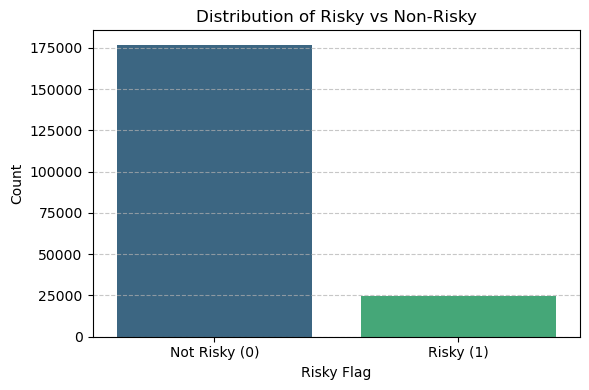

In [30]:
# code to check for class imbalance in y

# Check value counts
print("Class distribution:\n")
print(y.value_counts())

# Check proportions
print("\nClass proportions:\n")
print(y.value_counts(normalize=True))

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title("Distribution of Risky vs Non-Risky")
plt.xlabel("Risky Flag")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Risky (0)", "Risky (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Insight

0 (Not Risky): 176,844 samples i.e 87.7% while 1 (Risky): 24,756 samples i.e 12.3%.With this, our target is moderately imbalance. A perfect balance would be 50-50 but we have 7x more non-risky cases than risky ones.This means a model could easily "cheat" by predicting mostly 0s and still get high accuracy — but it would fail at identifying risky customers, which is our primary concern. To fix this, i will impliment a logistic regression . Why?  logistic regression is fast, interpretable, yields meaningful probabilities, and handles imbalanced classes gracefully by assigning class_weight=balanced. It’s the ideal baseline and often remains competitive even against more complex “black-box” methods.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Train
lr = LogisticRegression(
    class_weight='balanced',
    solver='saga',
    max_iter=5000,
    random_state=42,
    n_jobs=-1
)
lr.fit(X_train_red, y_train)

# 2) Validate
y_val_pred  = lr.predict(X_val_red)
y_val_proba = lr.predict_proba(X_val_red)[:, 1]

print("=== Validation Classification Report ===")
print(classification_report(y_val, y_val_pred, digits=4))
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_proba))

print("=== Validation Confusion Matrix ===")
print(confusion_matrix(y_val, y_val_pred))


# 4) Attach predictions to test-DataFrame
test['Risk_Flag_Pred'] = y_test_pred
test['Risk_Flag_Prob'] = y_test_proba


C:\Users\USER\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== Validation Classification Report ===
              precision    recall  f1-score   support

           0     0.8926    0.5270    0.6627     35369
           1     0.1394    0.5472    0.2221      4951

    accuracy                         0.5295     40320
   macro avg     0.5160    0.5371    0.4424     40320
weighted avg     0.8001    0.5295    0.6086     40320

Validation ROC AUC: 0.5634870719451142
=== Validation Confusion Matrix ===
[[18639 16730]
 [ 2242  2709]]


NameError: name 'y_test_pred' is not defined